In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
print(tf.__version__)

2.0.0-rc1


In [3]:
class mycallback(keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if logs.get("loss")<0.35:
            print("\n reached 75% accuracy so stopping training")
            self.model.stop_training=True

In [4]:
#loading dataset
mnist=keras.datasets.fashion_mnist
(trainingX,trainingY),(testingX,testingY)=mnist.load_data()

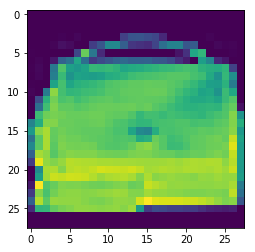

In [5]:
plt.imshow(trainingX[6456])

In [6]:
#Normalising the image
trainingX=trainingX/255.0
testingX=testingX/255.0

In [7]:
#defining model
model=keras.models.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation=tf.nn.relu),
    keras.layers.Dense(10,activation=tf.nn.sigmoid)
])
model.compile(optimizer=tf.optimizers.Adam(),loss='sparse_categorical_crossentropy',metrics=["accuracy"])

In [8]:
callbacks=mycallback()
model.fit(trainingX,trainingY,epochs=5,callbacks=[callbacks])

W0614 19:20:35.273499 13672 deprecation.py:323] From c:\users\home\anaconda3\envs\tensorflow\lib\site-packages\tensorflow_core\python\ops\math_grad.py:1394: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 80us/sample - loss: 0.5200 - accuracy: 0.8208
Epoch 2/5
60000/60000 [==============================] - 4s 69us/sample - loss: 0.3848 - accuracy: 0.8610
Epoch 3/5
59648/60000 [============================>.] - ETA: 0s - loss: 0.3439 - accuracy: 0.8754
 reached 75% accuracy so stopping training
60000/60000 [==============================] - 4s 69us/sample - loss: 0.3436 - accuracy: 0.8754


In [9]:
model.evaluate(testingX, testingY)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.37494073717594145, 0.867]

In [17]:
classifications=model.predict(testingX)
print(classifications[0])
print((np.where(classifications[0]==max(classifications[0]))[0]))
print(testingY[0])

[2.0861626e-07 0.0000000e+00 6.5565109e-07 5.9604645e-08 3.5762787e-07
 1.0552108e-03 7.7486038e-07 1.6809702e-03 1.9371510e-06 4.3826878e-02]
[9]
9
